In [96]:
from matplotlib import pyplot as plt
import sqlite3
import numpy as np

NUMBER_OF_LEVELS = 3

def get_all_models_keys():
    conn = sqlite3.connect('./data/exploration.db')
    cur = conn.cursor()
    
    cur.execute('SELECT difficulty_train, model_id FROM truth')
    keys = cur.fetchall()
    conn.close()
    return keys

def reconstruct_probs(difficult_train, model_id):
    conn = sqlite3.connect('./data/exploration.db')
    cur = conn.cursor()
    
    output = []
    for i in range(NUMBER_OF_LEVELS):
        values = (difficult_train, model_id, i,)
        cur.execute('SELECT win_prob, draw_prob, loss_prob FROM probabilities WHERE difficulty_train=? AND model_id=? AND difficulty_play=?', values)
        output.append(cur.fetchall())
    output_reshaped = []
    for i in range(3):
        tmp = []
        for j in range(NUMBER_OF_LEVELS):
            tmp.append(output[j][0][i])
        output_reshaped.append(tmp)
    conn.close()
    return output_reshaped

def reconstruct_mu_dynamics(difficult_train, model_id):
    conn = sqlite3.connect('./data/trueskill_dynamics.db')
    cur = conn.cursor()
    
    cur.execute('SELECT * FROM dynamics WHERE difficulty_train=? AND model_id=? ORDER BY idx', (difficult_train, model_id,))
    data = cur.fetchall()
    plot_list = np.zeros((4,len(data)))
    opponents = []
    for i in range(NUMBER_OF_LEVELS + 1):
        for j in range(len(data)):
            plot_list[i][j] = (data[j][i+4])
    for j in range(len(data)):
        opponents.append(data[j][8])
    
    conn.close()
    return plot_list, opponents
        
def plot_(title, data, opps, probs, save_plots=False):
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (15, 5) # (w, h)
    
    ax1 = plt.subplot2grid((1, 10), (0, 0), colspan=7)
    ax2 = plt.subplot2grid((1, 10), (0, 7))
    ax3 = plt.subplot2grid((1, 10), (0, 8))
    ax4 = plt.subplot2grid((1, 10), (0, 9))
    
    
    ax1.set_title(title)
    a1 = ax1.plot(data[0])
    a2 = ax1.plot(data[1])
    a3 = ax1.plot(data[2])
    a4 = ax1.plot(data[3])
    a5 = ax1.scatter(range(1, len(opps)+1),opps, c='C3')
    #a5 = ax.plot(opps)
    
    ax2.set_title('Win prob')
    ax3.set_title('Draw prob')
    ax4.set_title('Loss prob')
    
    colors = ['C0','C1','C2']
    x = (0.9,1,1.1)
    lim=(-0.05,1.05)
    ax2.set_ylim(lim)
    ax3.set_ylim(lim)
    ax4.set_ylim(lim)
    ax2.yaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax4.yaxis.tick_right()
    ax2.scatter(x, probs[0], c=colors)
    ax3.scatter(x, probs[1], c=colors)
    ax4.scatter(x, probs[2], c=colors)

    ax1.legend((a1[0], a2[0], a3[0], a4[0], a5), ('Easy', 'Medium', 'Hard', 'Player', 'Chosen\nlevel'), bbox_to_anchor=(-0.05, 1))
    
    if save_plots:
        path = './img/cumulative_plots/'
        plt.gcf().savefig(path + title + '.png', bbox_inches='tight')
    
    plt.show()

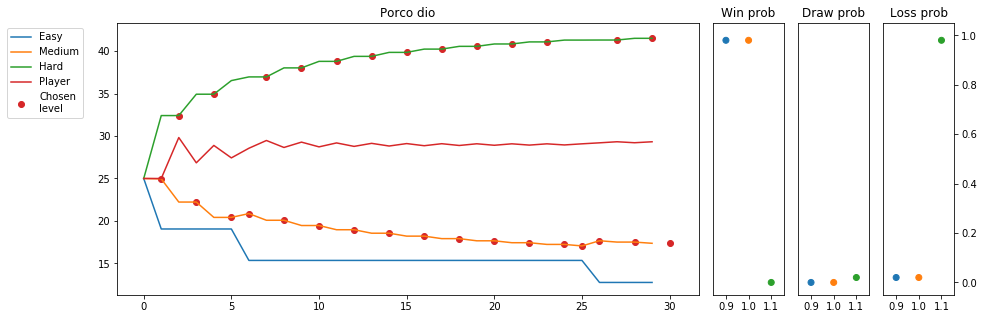

In [97]:
pl, opp = reconstruct_mu_dynamics('easy', 160000)
probs = reconstruct_probs('easy', 160000)
plot_('Porco dio', pl, opp, probs, save_plots=True)

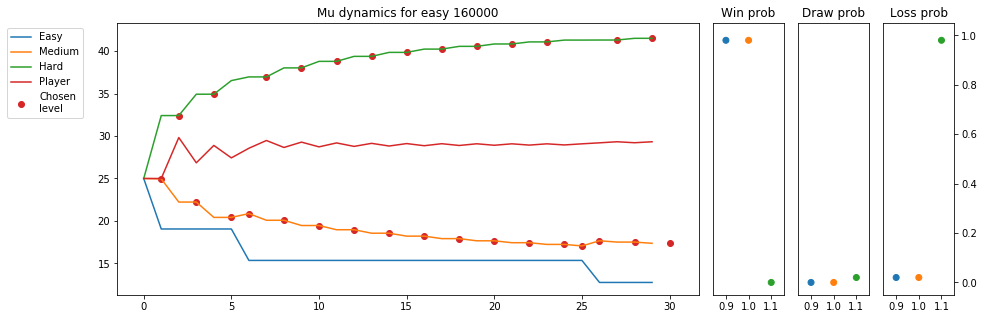

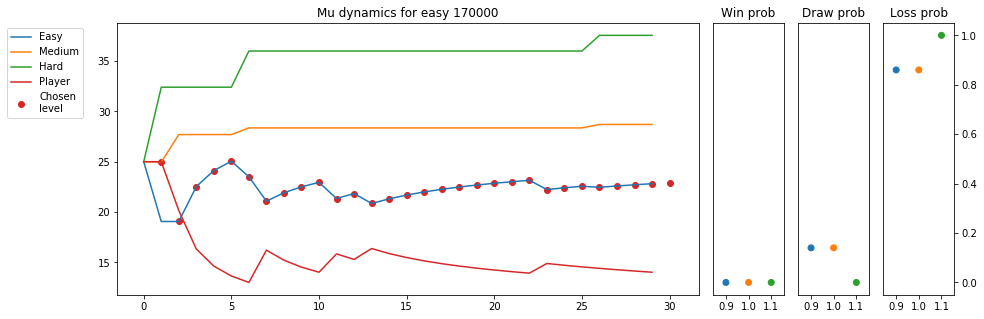

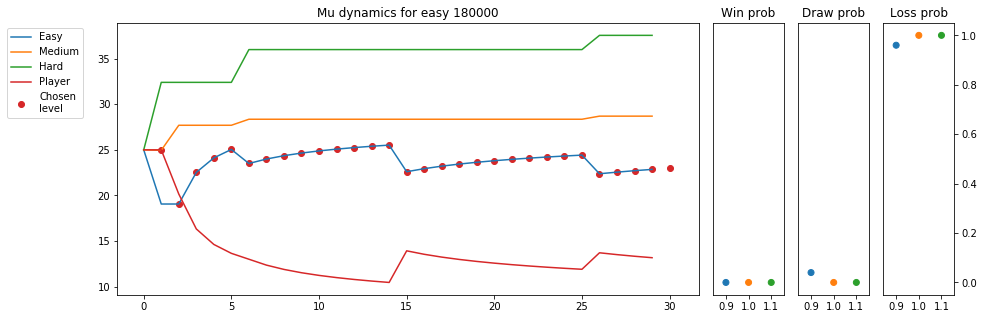

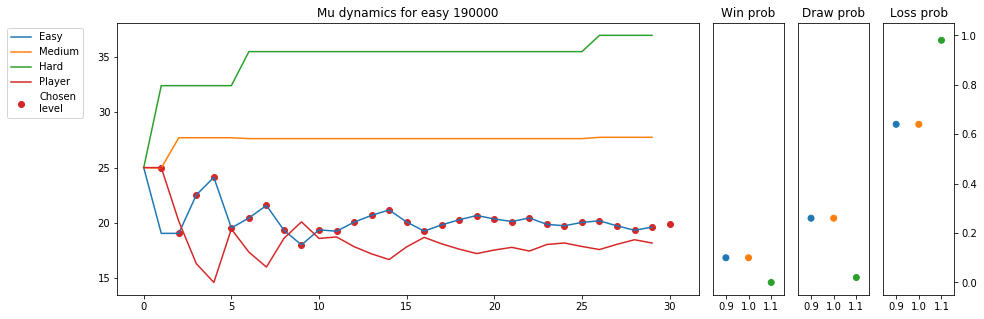

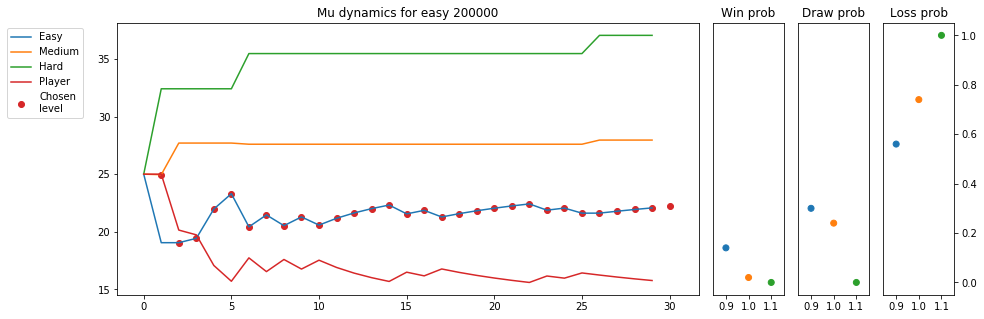

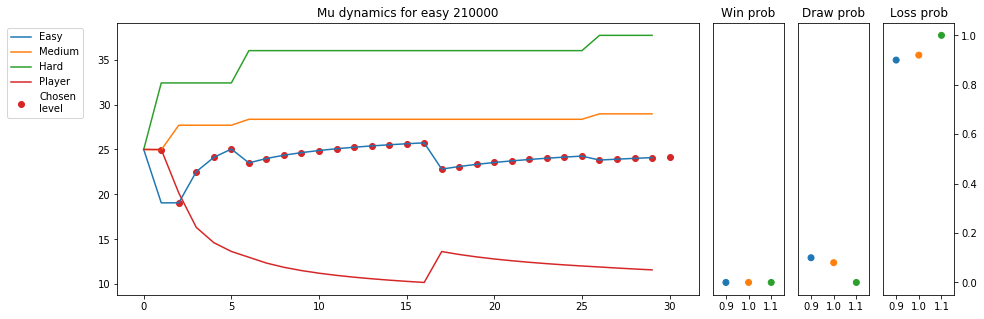

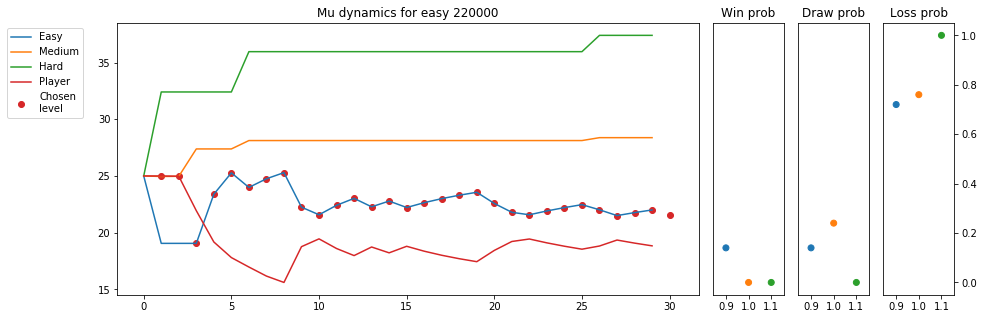

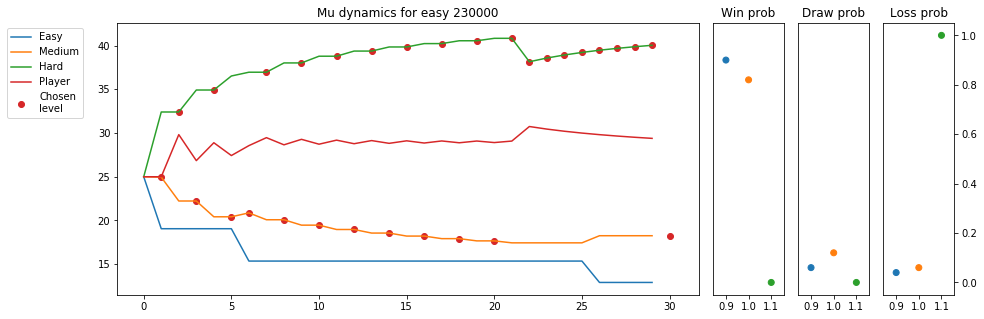

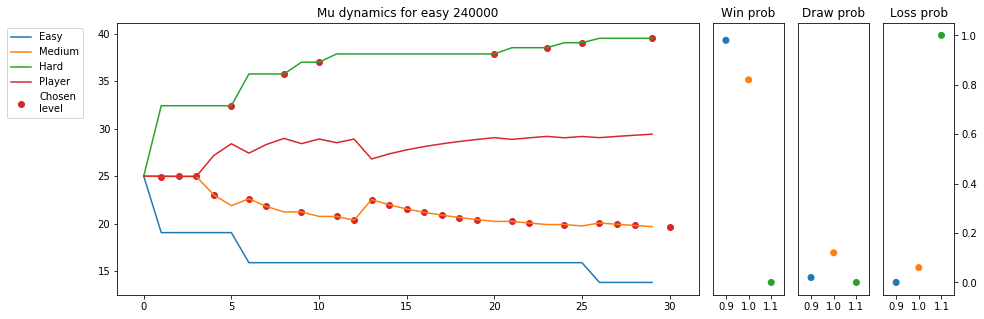

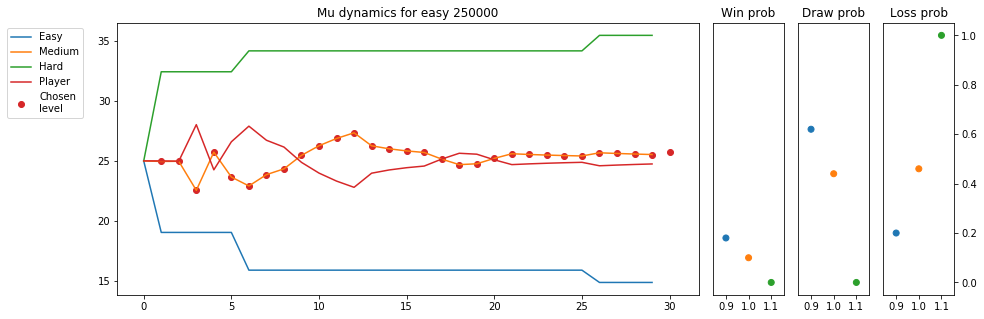

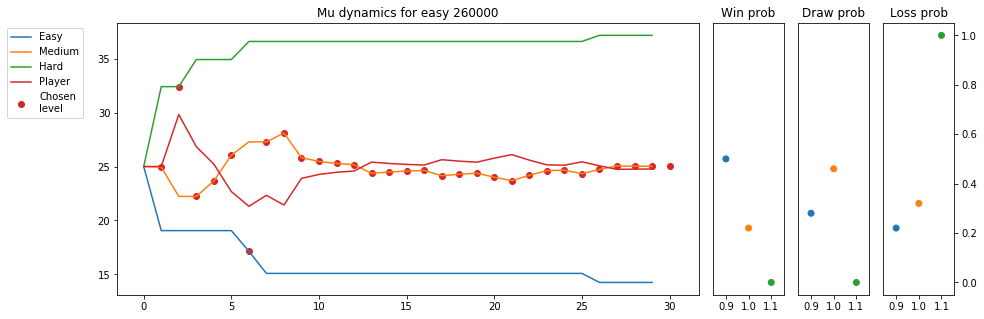

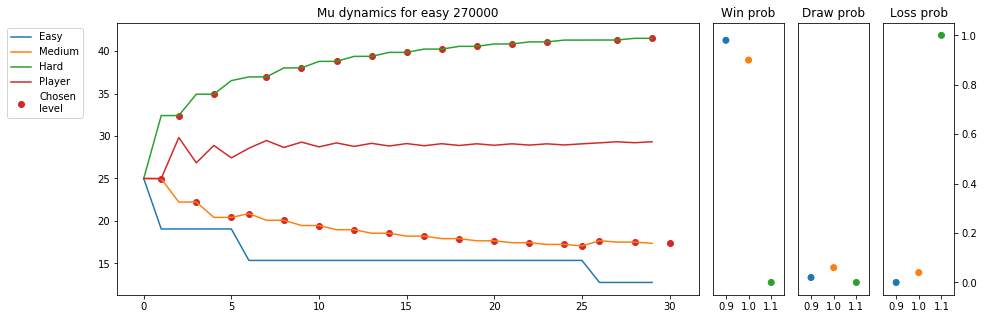

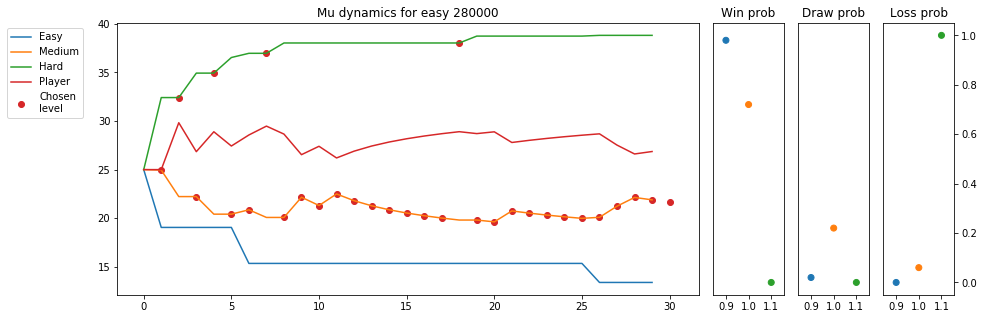

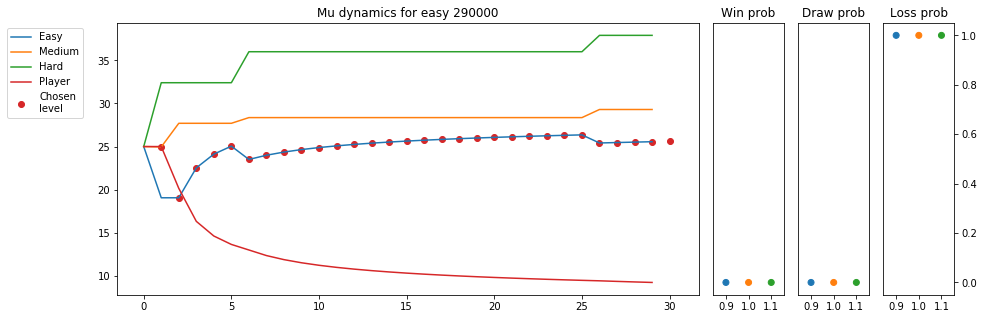

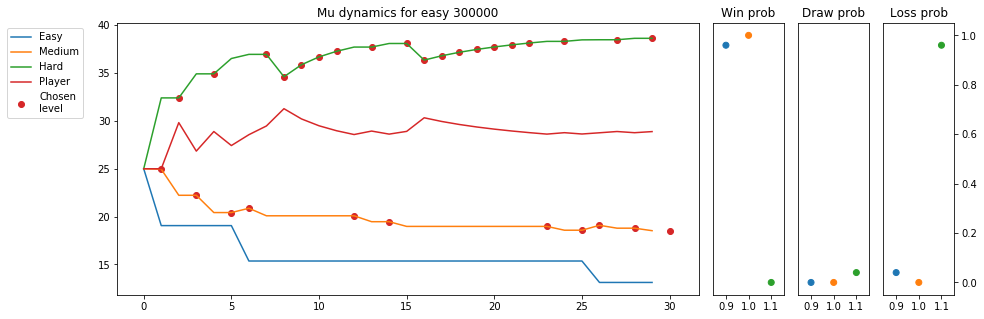

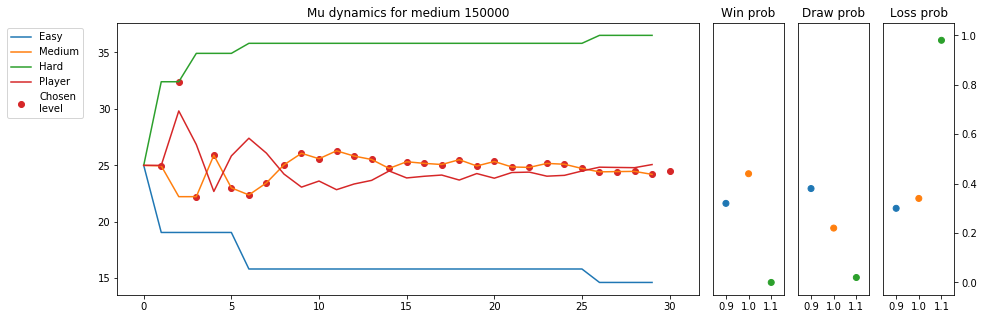

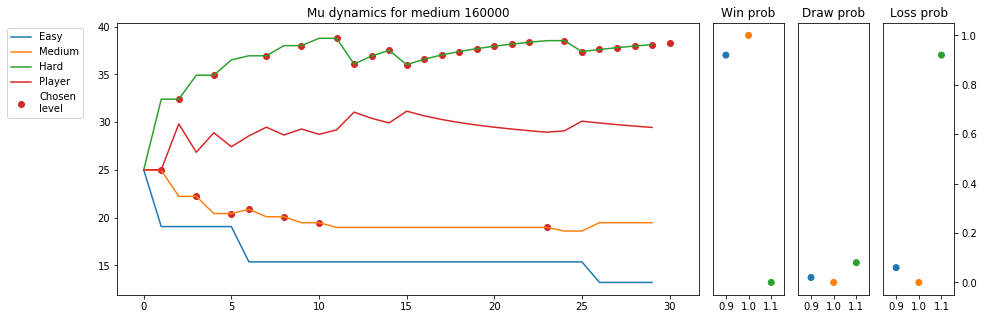

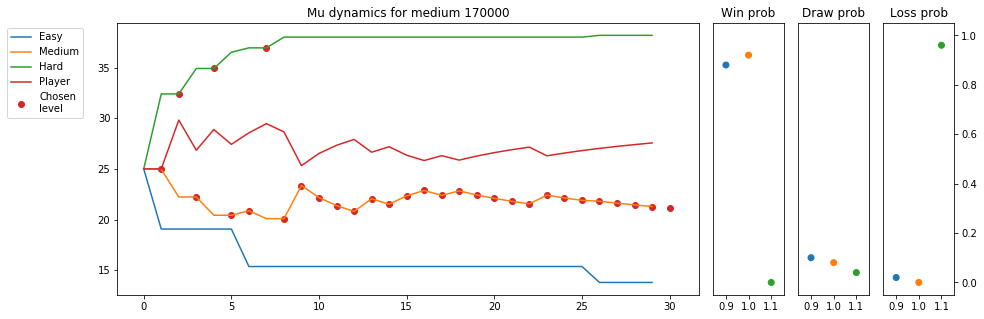

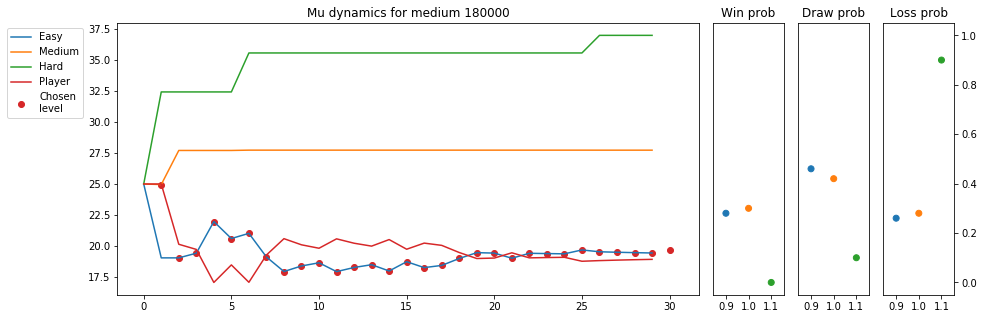

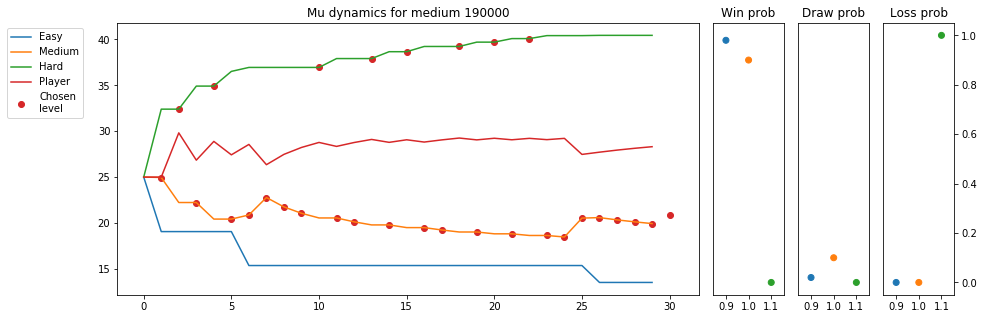

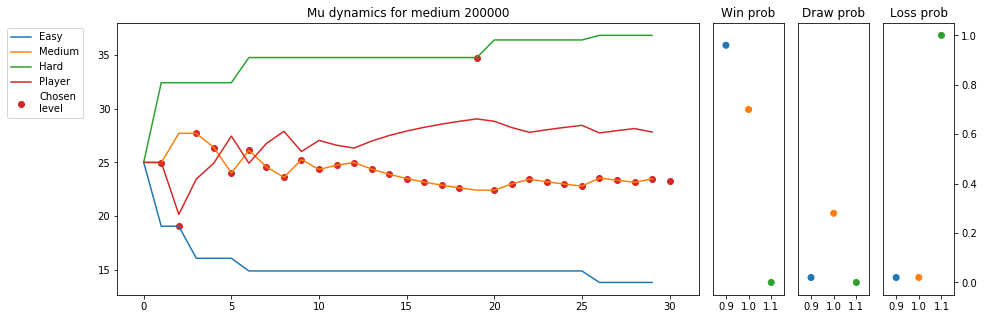

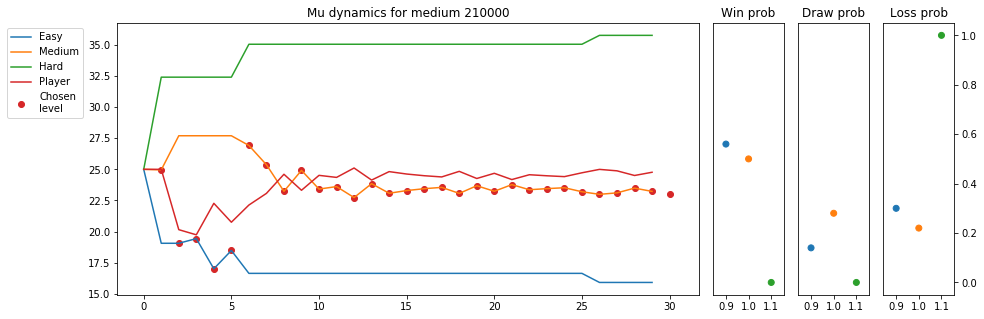

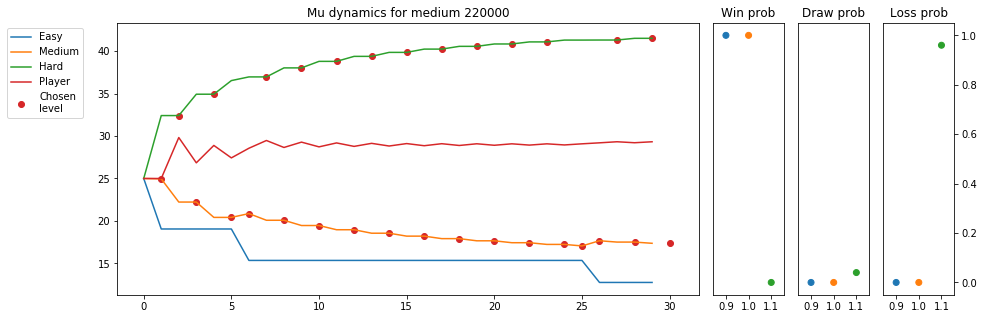

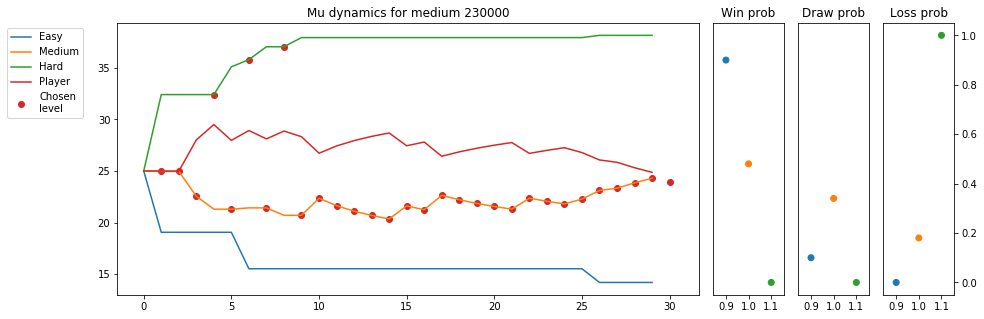

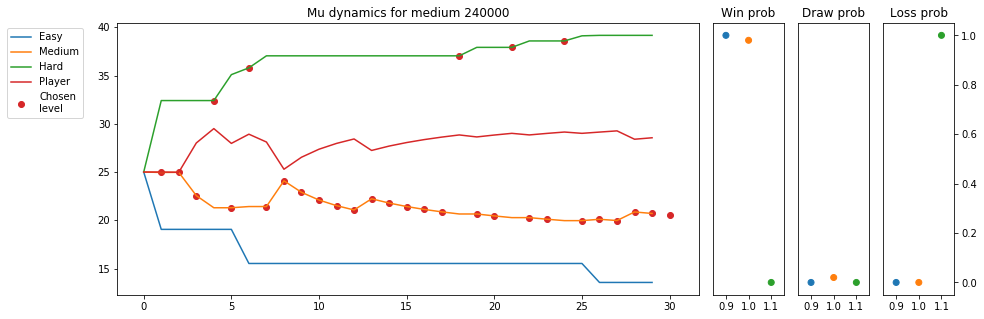

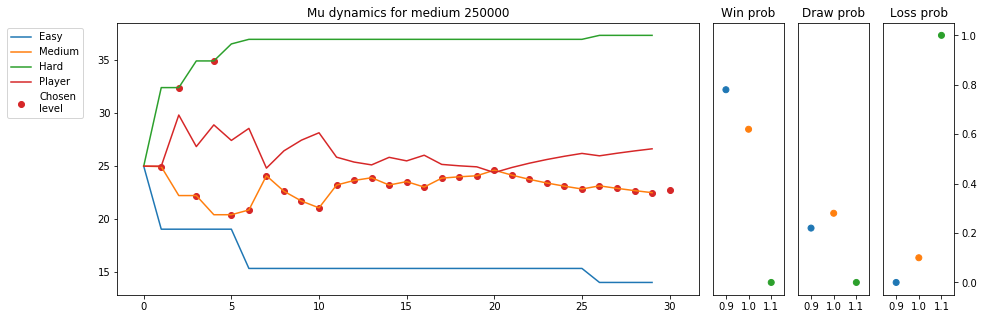

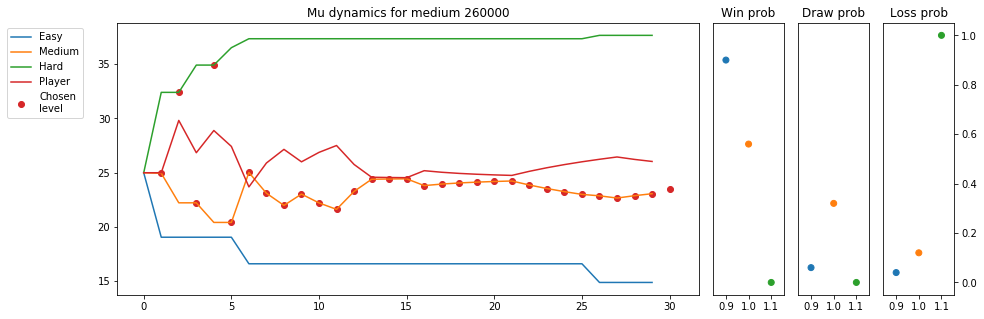

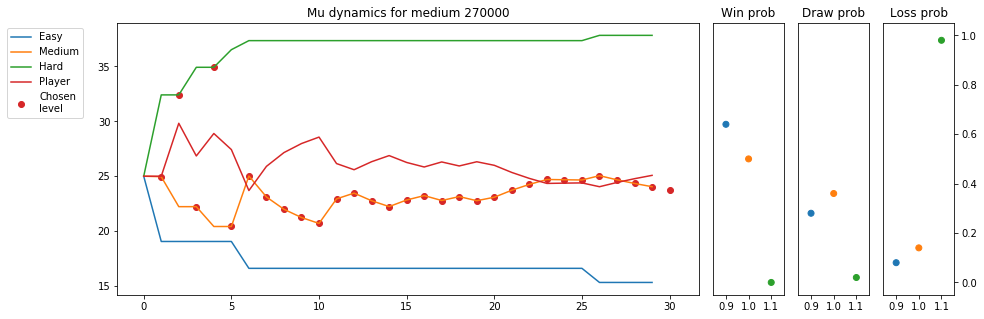

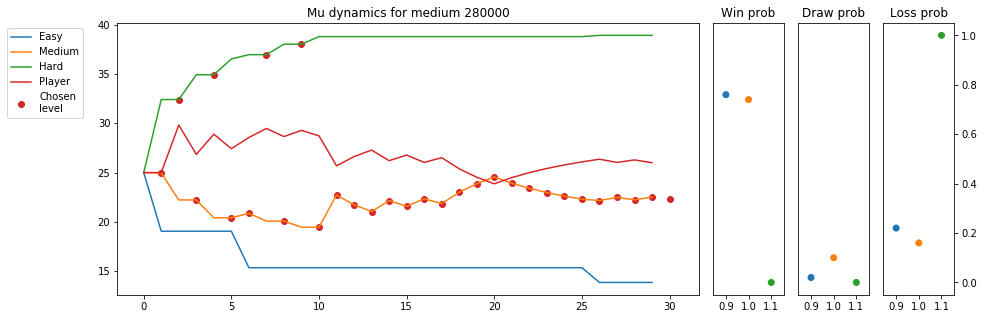

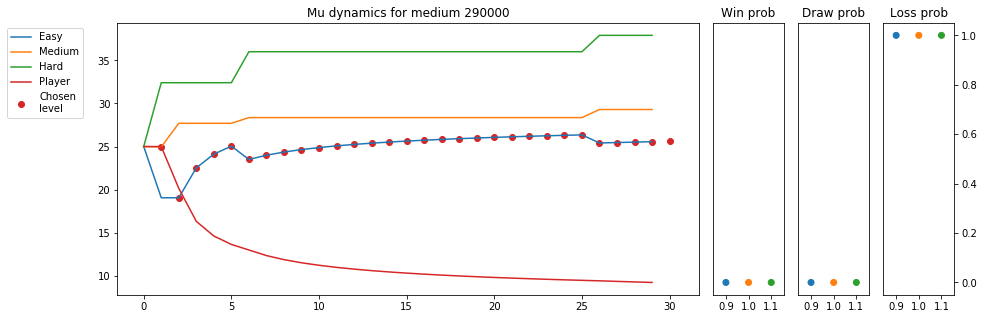

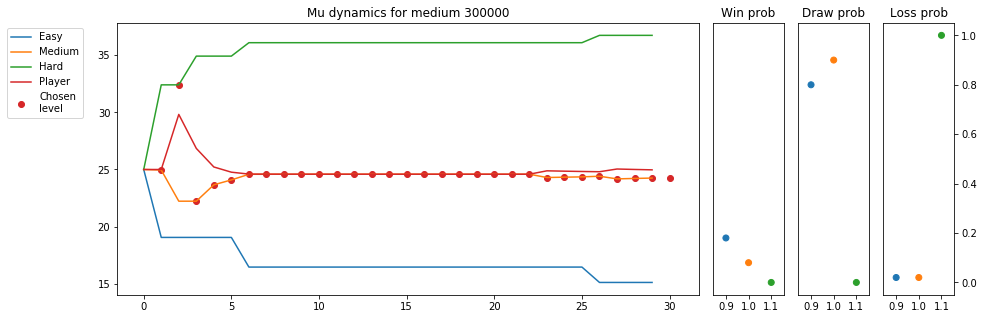

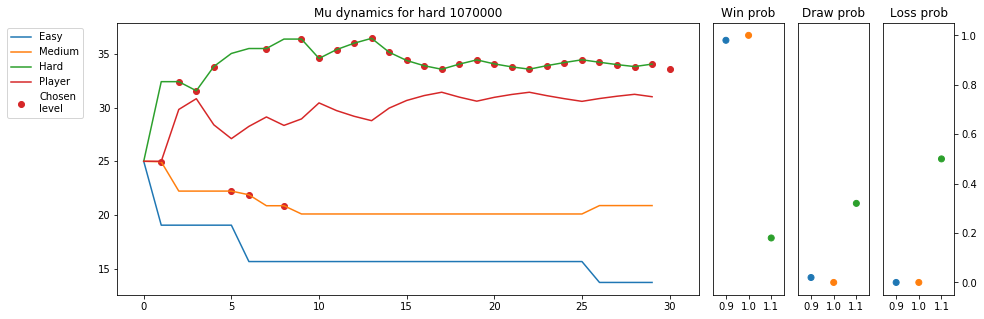

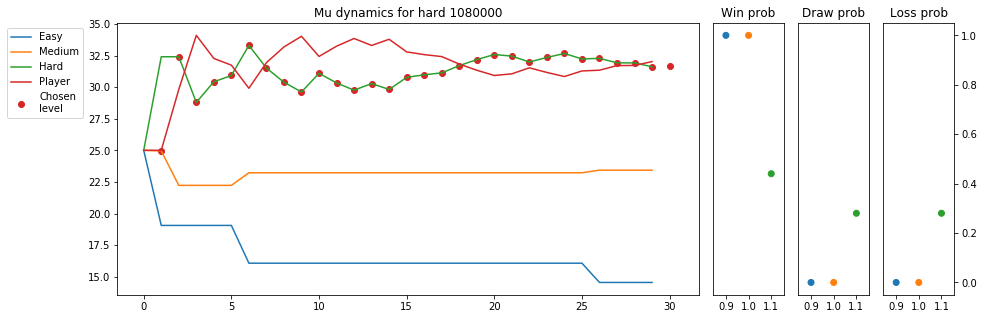

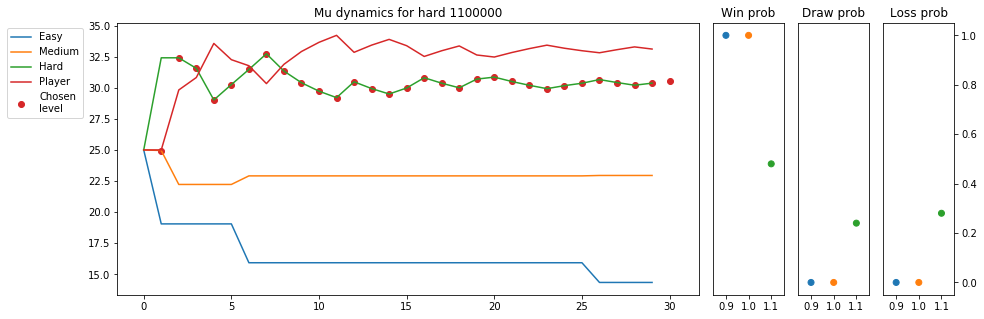

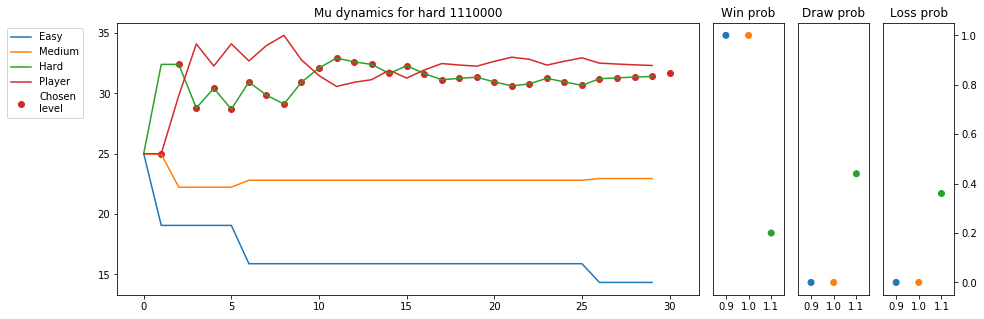

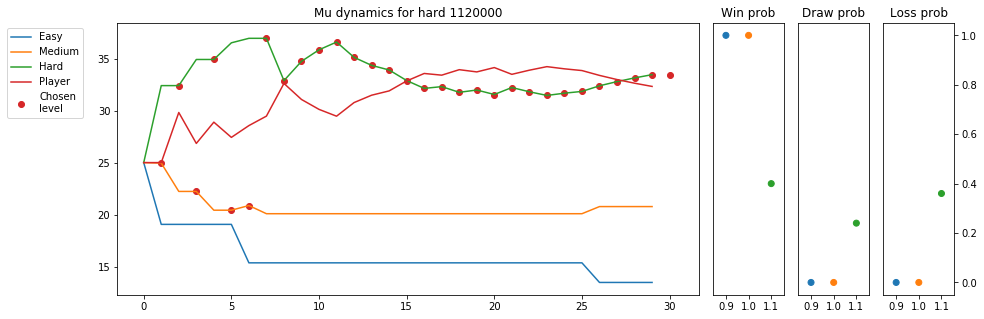

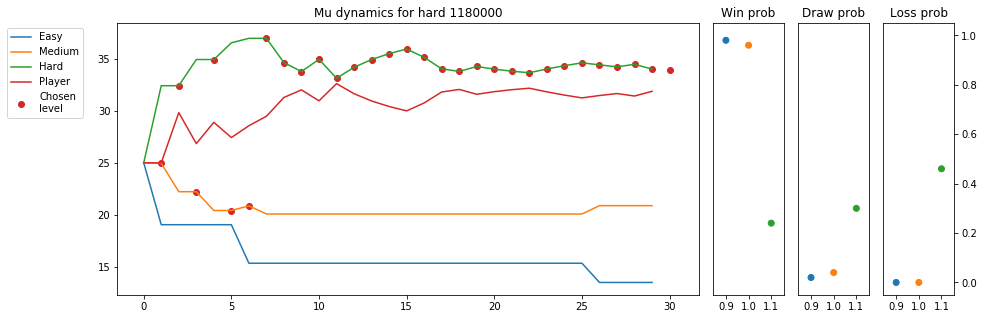

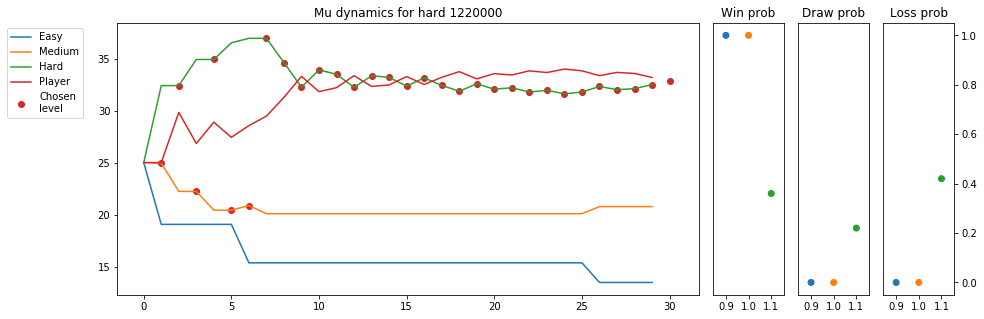

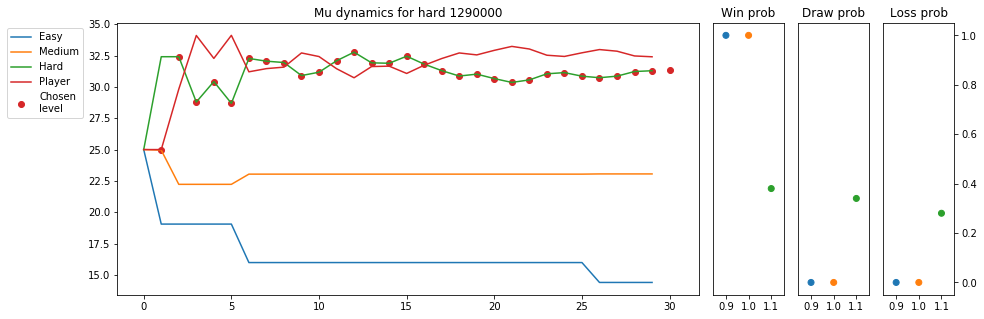

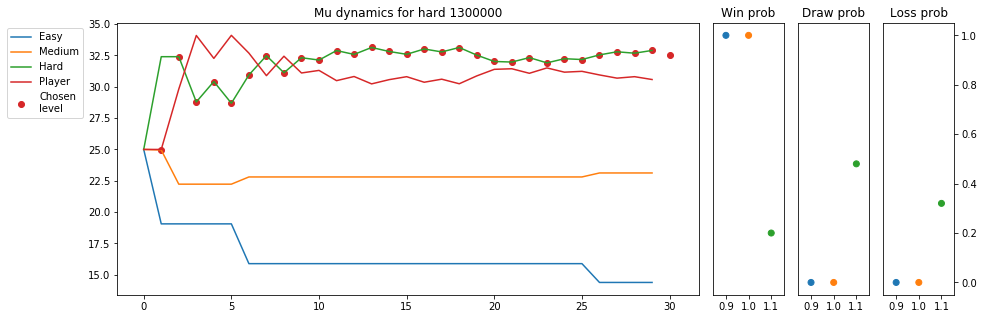

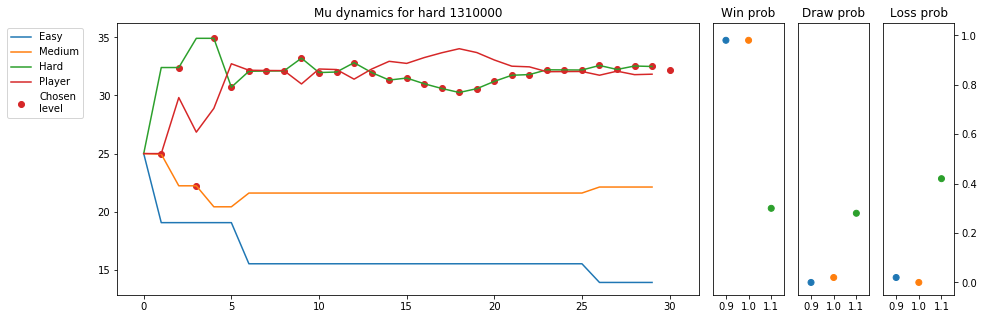

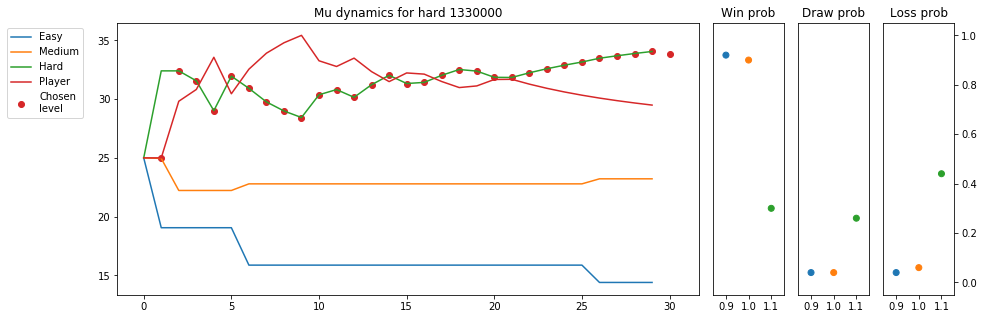

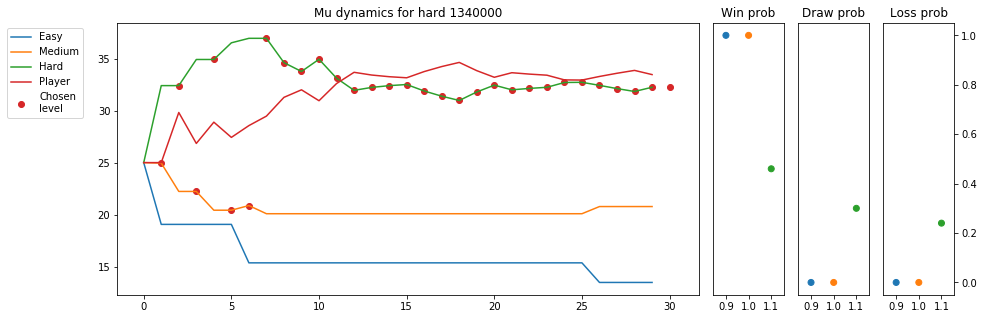

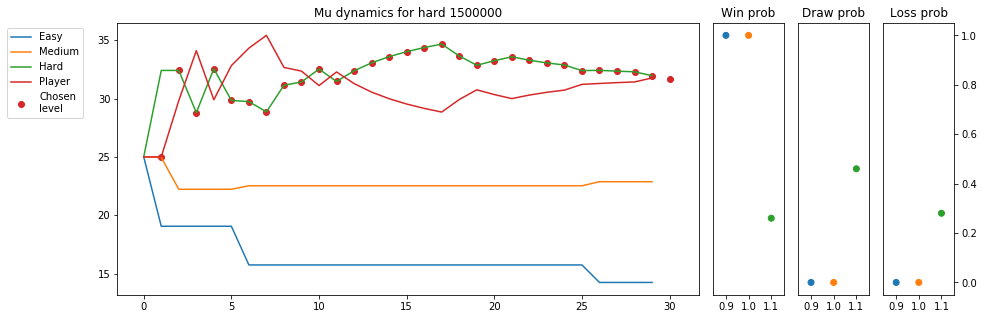

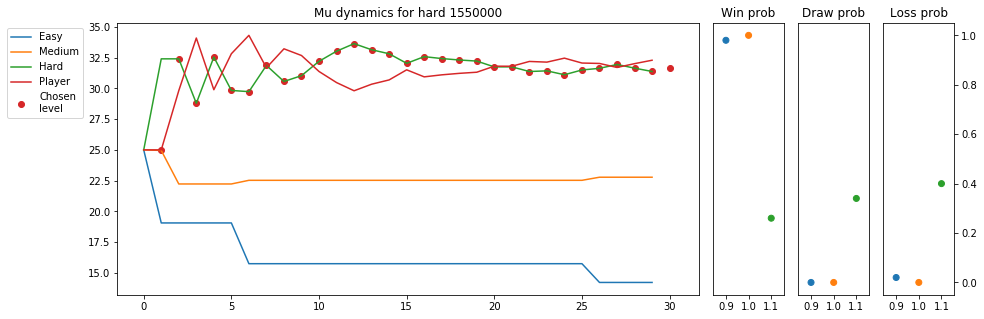

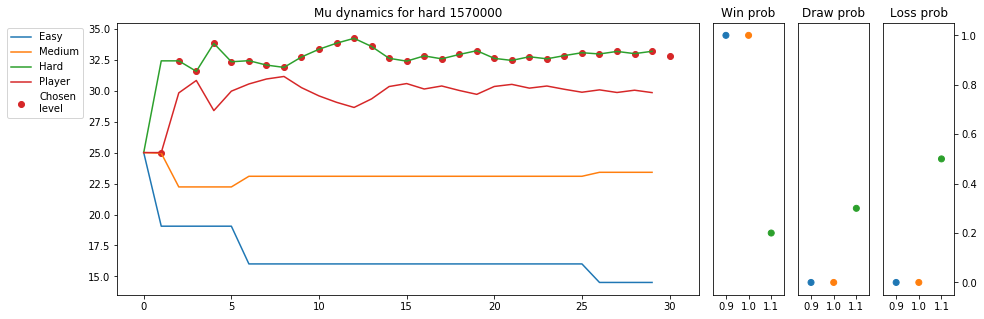

In [98]:
keys = get_all_models_keys()

for k in keys:
    pl, opp = reconstruct_mu_dynamics(k[0], k[1])
    probs = reconstruct_probs(k[0], k[1])
    title = 'Mu dynamics for {} {}'.format(k[0], k[1])
    plot_(title, pl, opp, probs, save_plots=True)